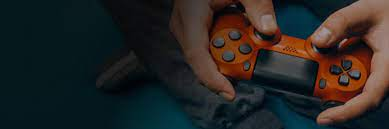

# Decoding Video Game Industry Trends: Analyzing Sales Data for Strategic Insights

Video games have been intertwined with our memories since childhood, remaining a source of entertainment even as adults. But how is the industry faring today? Let's delve into a data-driven exploration of video game sales through graphical visualization to uncover contemporary insights.

The dataset is taken from https://www.kaggle.com/rishidamarla/video-game-sales

Libraries used in project : 
* [Pandas](https://pandas.pydata.org/) : a software library written for the Python programming language for data manipulation and analysis
* [Numpy](https://numpy.org/) : a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. 
* [Matplotlib](https://matplotlib.org/) : a plotting library for the Python programming language and its numerical mathematics extension NumPy.
* [Seaborn](https://seaborn.pydata.org/) : a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Thanks [Jovian](https://jovian.ml/) for the course project.


### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

Firstly We need to download the dataset to use. The link is already provided in the description above. You can also find a lot of interesting datasets on [Kaggle](https://www.kaggle.com/)

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [4]:
dataset_url = 'https://www.kaggle.com/rishidamarla/video-game-sales' 

The downloader will need to use ur username and apikey (generated in ur profile account on Kaggle) so firstly you should probably regis an account on Kaggle.

In [5]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: cyberpunk98
Your Kaggle Key: ········


100%|██████████| 476k/476k [00:01<00:00, 387kB/s]

In [6]:
data_dir = './video-game-sales'

In [7]:
import os
os.listdir(data_dir)

['Video_Games.csv']

The dataset has been downloaded and extracted.

Let us save and upload our work to Jovian before continuing.

In [8]:
project_name = "data-analysis-of-video-game-sales"

In [9]:
!pip install jovian --upgrade -q

In [10]:
import jovian

In [11]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "riyazuddin749290000/data-analysis-of-video-game-sales" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/riyazuddin749290000/data-analysis-of-video-game-sales


'https://jovian.com/riyazuddin749290000/data-analysis-of-video-game-sales'

## Data Preparation and Cleaning

Firstly we should load the dataset into Pandas data frame and take a look what can we get with this dataset.



In [41]:
import pandas as pd

In [42]:
df = pd.read_csv('./video-game-sales/Video_Games.csv')

In [43]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


#### We have 16719 rows equal to 16719 game titles here. We should probably check out the columns and info to see if this dataset is already workable

In [44]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Look at the info we can see that :
- Not every game is rating and get critic score. 
- Year of release | Platform doesnt match the name index. 

We should try removing nun object for a better dataframe.

In [46]:
#remove null value in Year of release column
df.drop(game_sales_df[game_sales_df.Year_of_Release.isnull()].index, inplace = True) 

#remove null value in Name column
df.drop(game_sales_df[game_sales_df.Name.isnull()].index, inplace = True)

#remove null value in Publisher column
df.drop(game_sales_df[game_sales_df.Publisher.isnull()].index, inplace = True) 

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.7+ MB


Ok that dataframe seems good enough. We should take a closer look at the description.

In [48]:
game_sales_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,7982.000000,7982.000000,7461.000000
mean,2006.489888,0.264129,0.146034,0.078623,0.047670,0.536708,68.997119,26.440992,163.008846
std,5.881148,0.819028,0.507134,0.311348,0.188156,1.559885,13.918755,19.009305,563.932422
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


- We have around 16416 game titles that was sold between 1980 and 2020. 
- NA seems like the biggest market to sell game.
- Sales are in millions 

In [49]:
import jovian

In [50]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "riyazuddin749290000/data-analysis-of-video-game-sales" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/riyazuddin749290000/data-analysis-of-video-game-sales


'https://jovian.com/riyazuddin749290000/data-analysis-of-video-game-sales'

## Exploratory Analysis and Visualization

At first look the dataframe is already sorted by Global_Sales. But for a better viewer we should try creating a few graphs.


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [55]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 13
matplotlib.rcParams['figure.figsize'] = (36, 20)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Total Sales Every Year

First, We should see the total sales of games each year. It helps us know when video games are declining and when they are popular.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


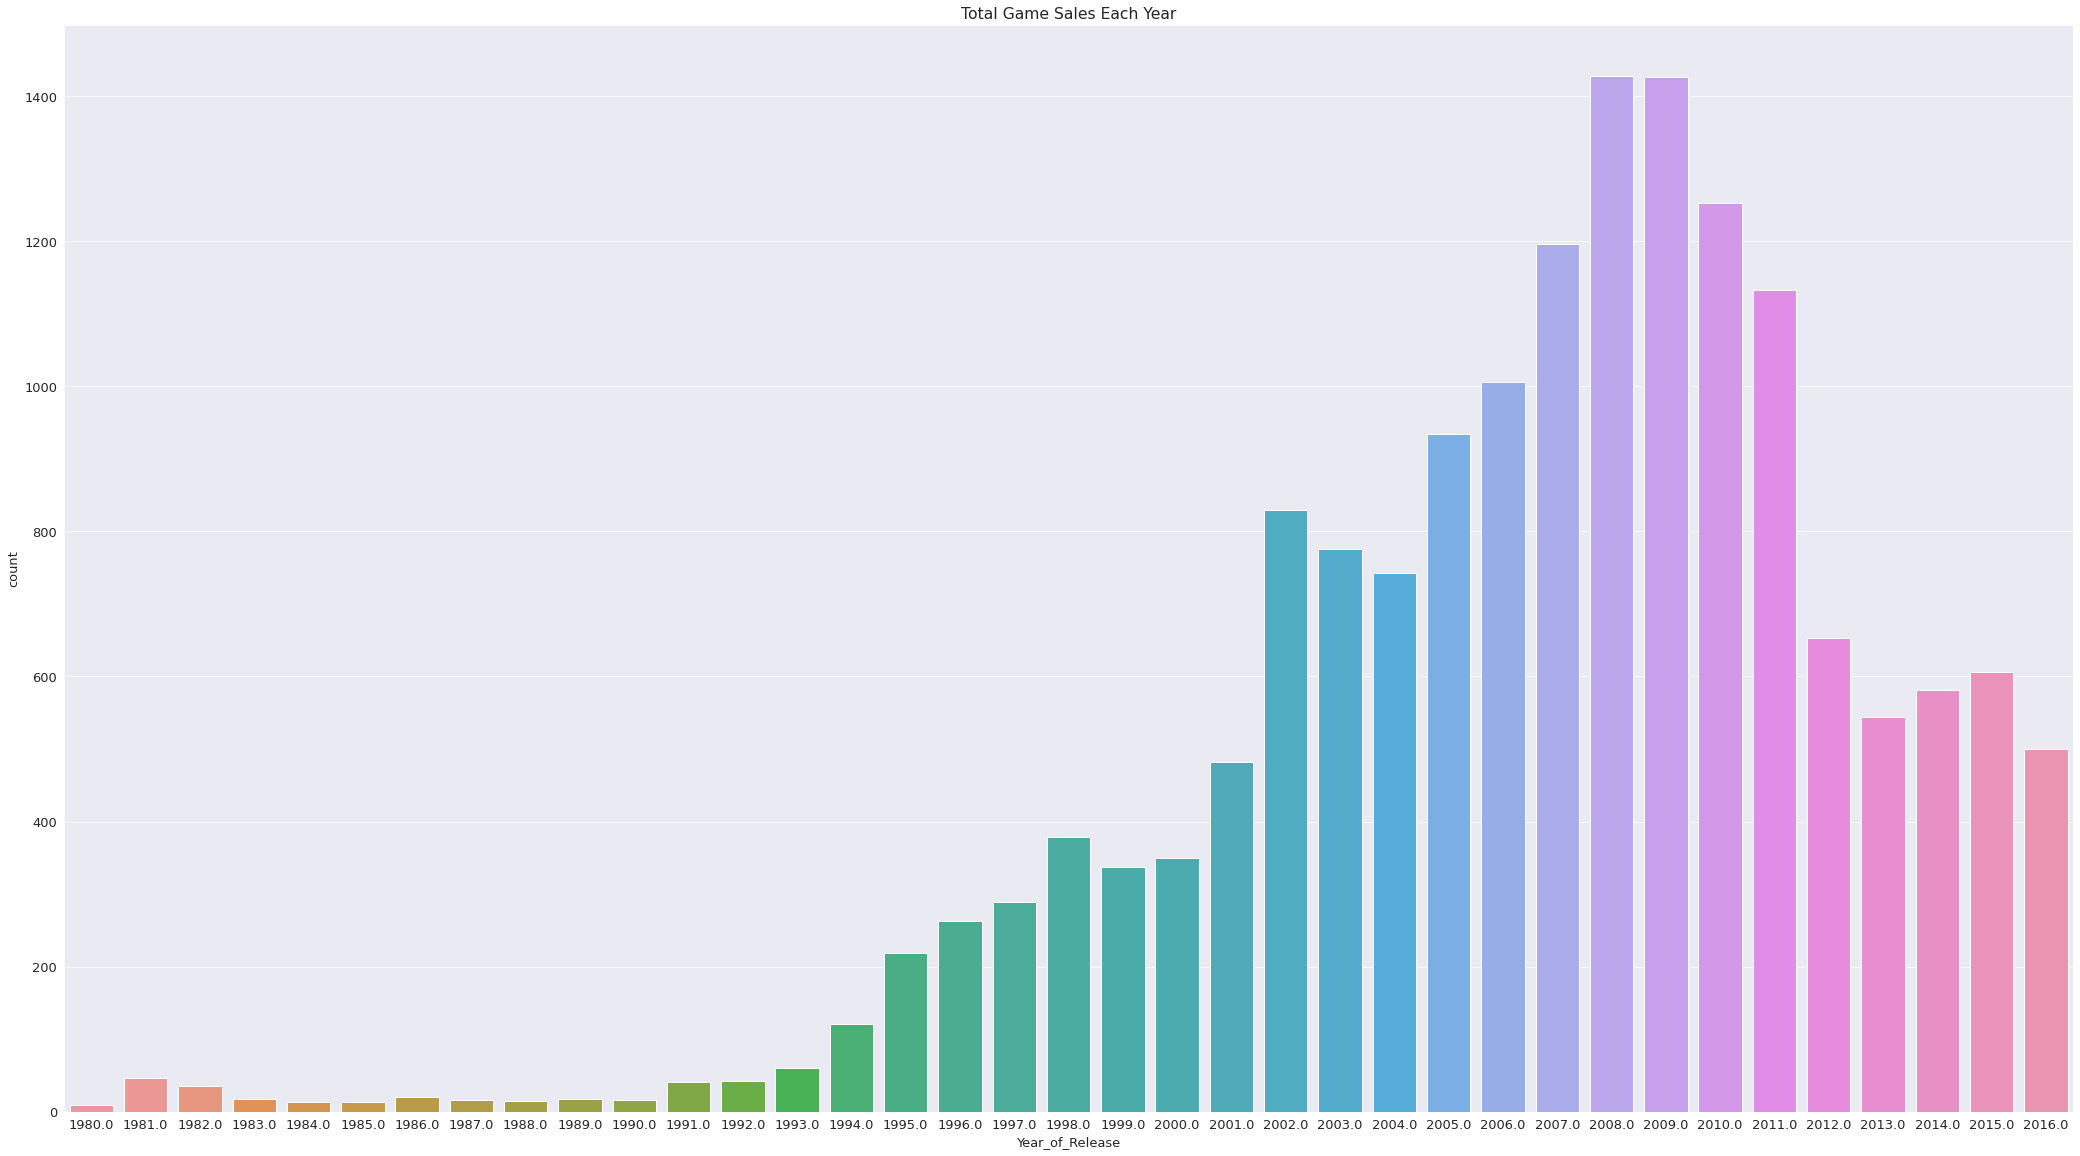

In [56]:
sns.countplot('Year_of_Release', data = game_sales_df)
plt.title('Total Game Sales Each Year')
plt.show()

Seems like we don't have much data from 2017 to 2020 let remove them and try using another graph for better view.

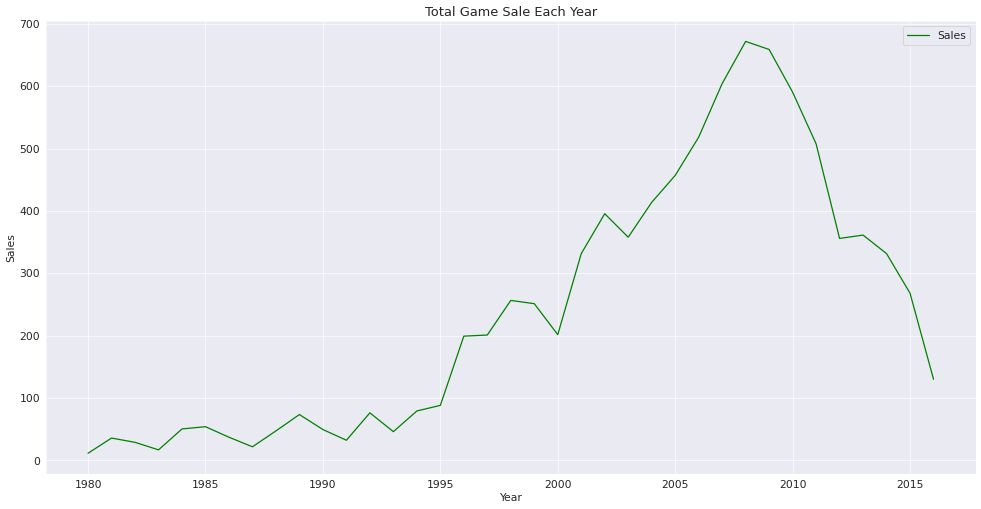

In [57]:
# remove games that were released after 2016 
game_sales_df.drop(game_sales_df[game_sales_df.Year_of_Release > 2016].index, inplace = True)

sales_df = game_sales_df.groupby('Year_of_Release', as_index = False).sum()

x_axis = sales_df['Year_of_Release']
y_axis = sales_df['Global_Sales']

plt.figure(figsize=(20,10), dpi= 60)
plt.plot(x_axis, y_axis, label = 'Sales', color = 'green')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Total Game Sale Each Year')
plt.legend()
plt.show()

### Total Sale Comparison Between Region Area

Let add other sales area as well like NA | EU | JP 

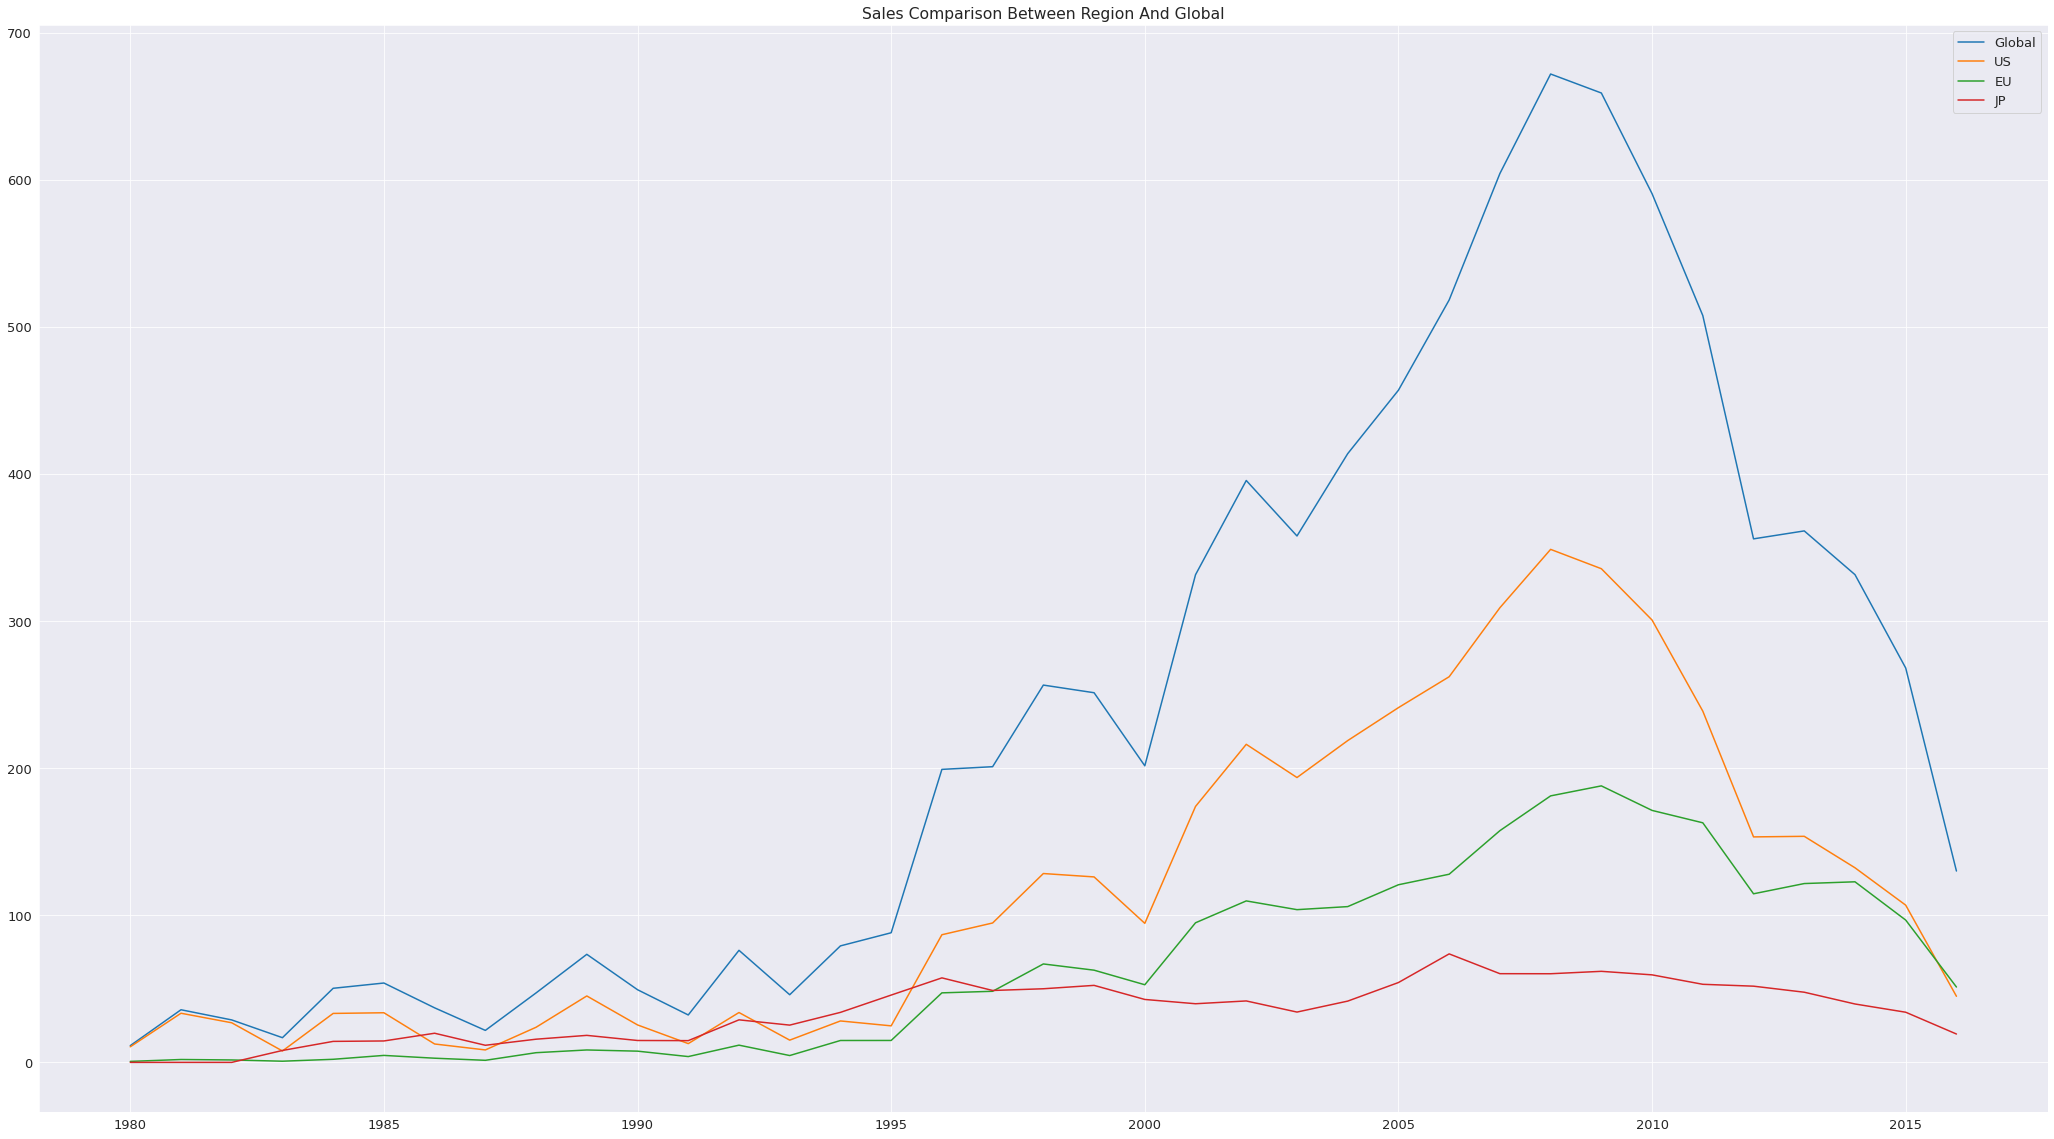

In [58]:
na = sales_df['NA_Sales']
eu = sales_df['EU_Sales']
jp = sales_df['JP_Sales']
total = sales_df['Global_Sales']

plt.title('Sales Comparison Between Region And Global')
plt.plot(x_axis, total, label = 'Global')
plt.plot(x_axis, na, label = 'US')
plt.plot(x_axis, eu, label = 'EU')
plt.plot(x_axis, jp, label = 'JP')
plt.legend(bbox_to_anchor =(1, 1))

We can see that the US is the largest market followed by the EU and JP. JP is pretty consistent and doesn't seem to be declined that much. In 2008 and 2009 video games were explored in popularity so we should take a look at the game list in these years.

### Top 10 Games and Platform in 2008 and 2009

In [59]:
top_games_2008 = game_sales_df.loc[game_sales_df['Year_of_Release'] == 2008]
top_games_2008.sort_values('Global_Sales',ascending = False).head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
39,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,6.62,2.55,2.66,1.01,12.84,93.0,81.0,8.9,1662.0,Game Arts,T
51,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.76,3.07,0.14,1.03,11.01,98.0,86.0,7.9,2951.0,Rockstar North,M
57,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.69,0.44,1.61,10.50,98.0,64.0,7.5,2833.0,Rockstar North,M
90,Pokémon Platinum Version,DS,2008.0,Role-Playing,Nintendo,2.76,1.72,2.69,0.54,7.72,83.0,46.0,8.5,203.0,Game Freak,E
100,Call of Duty: World at War,X360,2008.0,Shooter,Activision,4.81,1.88,0.00,0.69,7.38,84.0,84.0,7.6,580.0,Treyarch,M
117,Gears of War 2,X360,2008.0,Shooter,Microsoft Game Studios,4.15,1.90,0.06,0.64,6.75,93.0,90.0,7.7,2739.0,Epic Games,M
147,Metal Gear Solid 4: Guns of the Patriots,PS3,2008.0,Action,Konami Digital Entertainment,2.63,1.71,0.83,0.82,5.99,94.0,82.0,8.7,3558.0,Kojima Productions,M
150,LittleBigPlanet,PS3,2008.0,Platform,Sony Computer Entertainment,2.80,1.98,0.17,0.87,5.82,95.0,85.0,6.8,5311.0,"SCE/WWS, Media Molecule",E
163,Monster Hunter Freedom Unite,PSP,2008.0,Role-Playing,Capcom,0.47,0.55,4.13,0.34,5.48,81.0,48.0,8.7,124.0,Capcom,T


In [60]:
top_games_2009 = game_sales_df.loc[game_sales_df['Year_of_Release'] == 2009]
top_games_2009.sort_values('Global_Sales',ascending = False).head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E
36,Call of Duty: Modern Warfare 2,X360,2009.0,Shooter,Activision,8.52,3.59,0.08,1.28,13.47,94.0,100.0,6.3,2698.0,Infinity Ward,M
46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009.0,Action,Nintendo,4.34,2.71,3.96,0.76,11.77,NaN,NaN,NaN,NaN,NaN,NaN
55,Call of Duty: Modern Warfare 2,PS3,2009.0,Shooter,Activision,4.99,3.64,0.38,1.60,10.60,94.0,67.0,6.3,2073.0,Infinity Ward,M
85,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.99,6.42,0.00,0.60,8.01,86.0,75.0,7.6,886.0,The Sims Studio,T
103,Just Dance,Wii,2009.0,Misc,Ubisoft,3.48,2.99,0.00,0.73,7.20,49.0,21.0,8,110.0,Ubisoft Paris,E10+
121,Uncharted 2: Among Thieves,PS3,2009.0,Action,Sony Computer Entertainment,3.27,2.20,0.21,0.98,6.66,96.0,105.0,8.8,5187.0,Naughty Dog,T
134,Halo 3: ODST,X360,2009.0,Shooter,Microsoft Game Studios,4.34,1.34,0.06,0.61,6.34,83.0,94.0,7.1,1163.0,"Bungie Software, Bungie",M


In 2008 and 2009, the most popular game was from Wii platform. That's pretty interesting let see the pie graph for platform (We should combine two dataframe as well)

In [61]:
combine_list = top_games_2008.append(top_games_2009)
platform_counts = combine_list.Platform.value_counts()
platform_counts

DS      895
Wii     607
X360    318
PS3     300
PS2     287
PSP     261
PC      183
XB        1
DC        1
Name: Platform, dtype: int64

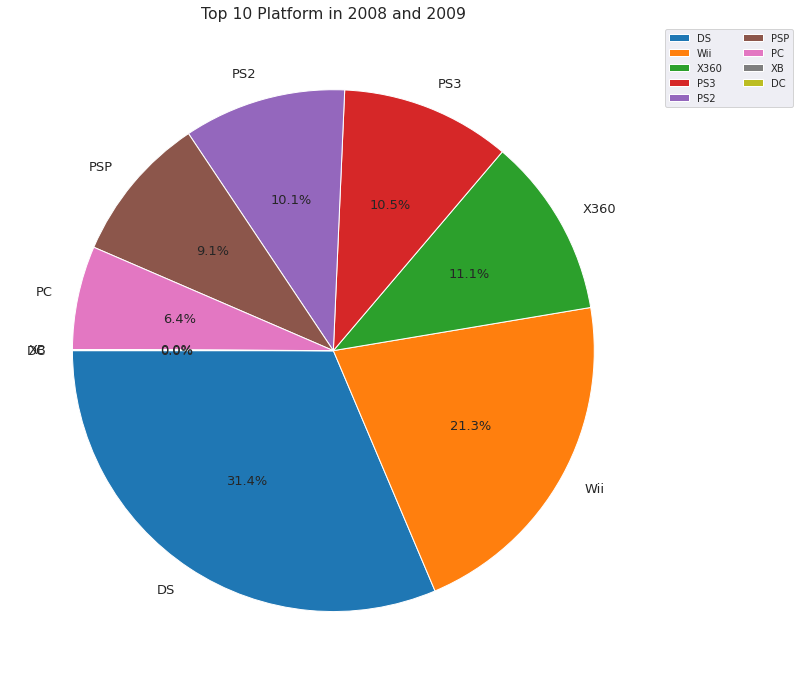

In [62]:
plt.figure(figsize=(24,12))
plt.title("Top 10 Platform in 2008 and 2009")
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=180);
plt.legend(loc = 2,fontsize  = 10, bbox_to_anchor = (1, 1), ncol = 2)

### Top 10 Platform Overall

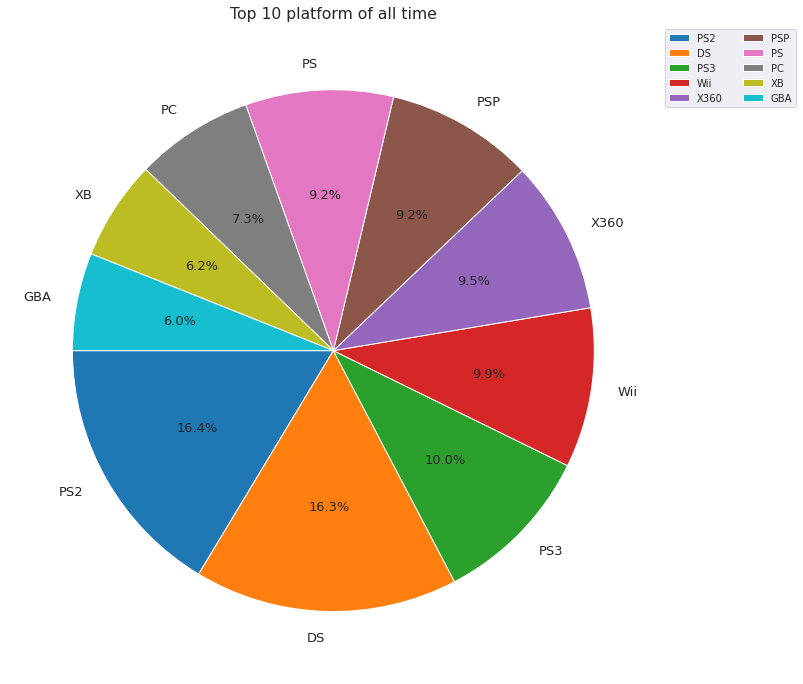

In [63]:
top10_platforms = game_sales_df.Platform.value_counts().head(10)

plt.figure(figsize=(24,12))
plt.title("Top 10 platform of all time")
plt.pie(top10_platforms, labels=top10_platforms.index, autopct='%1.1f%%', startangle=180);
plt.legend(loc = 2,fontsize  = 10, bbox_to_anchor = (1, 1), ncol = 2)

PS2 still dominated for many years, truly the best selling console of all time.

### Top 10 Publishers

In [64]:
top_publishers = game_sales_df.Publisher.value_counts().head(10)
top_publishers

Electronic Arts                 1344
Activision                       976
Namco Bandai Games               935
Ubisoft                          929
Konami Digital Entertainment     825
THQ                              712
Nintendo                         700
Sony Computer Entertainment      686
Sega                             629
Take-Two Interactive             421
Name: Publisher, dtype: int64

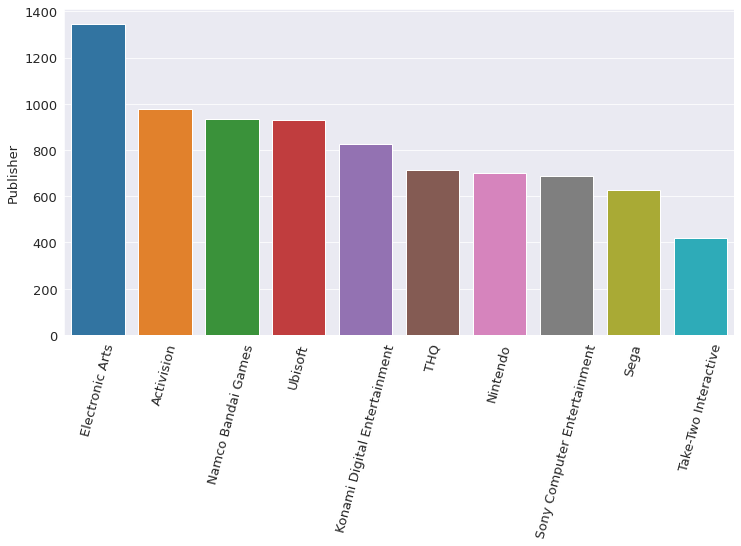

In [39]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.barplot(top_publishers.index, top_publishers);

### Top 10 Genre

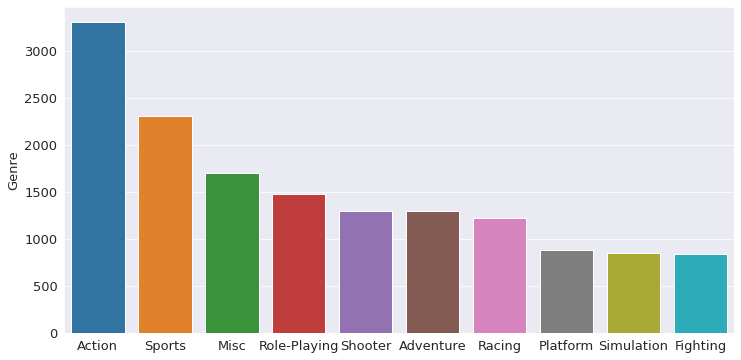

In [40]:
top_genres = game_sales_df.Genre.value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(top_genres.index, top_genres);

We should use Pie chart for this kind of thing. Since It can give you the percent of each genre as well.

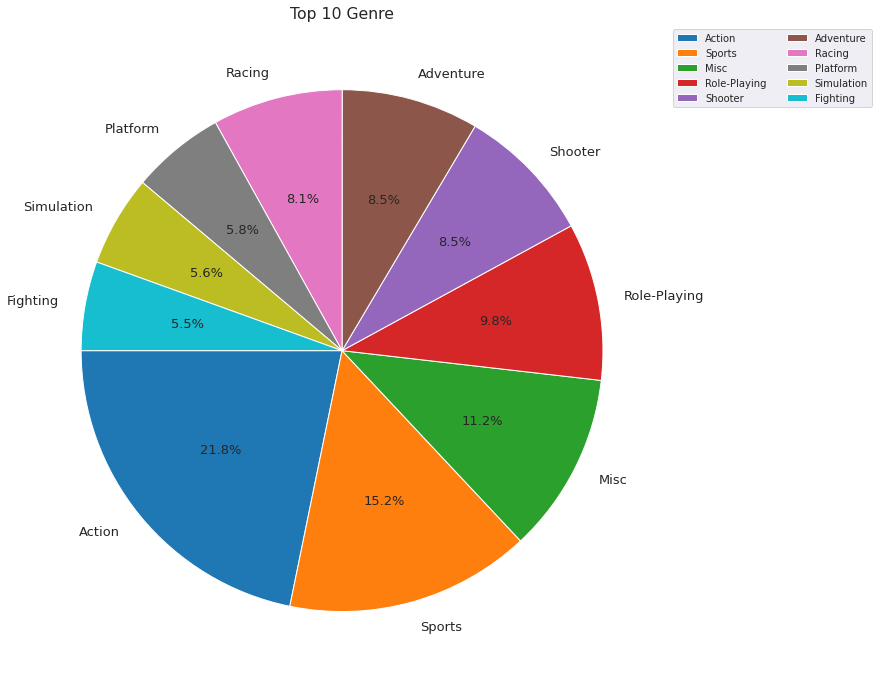

In [41]:
plt.figure(figsize=(24,12))
plt.title("Top 10 Genre")
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', startangle=180);
plt.legend(loc = 2,fontsize  = 10, bbox_to_anchor = (1, 1), ncol = 2)

Let us save and upload our work to Jovian before continuing

In [42]:
import jovian

In [43]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "indexkyou/data-analysis-of-video-game-sales" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/indexkyou/data-analysis-of-video-game-sales


'https://jovian.ml/indexkyou/data-analysis-of-video-game-sales'

## Asking and Answering Questions



#### Q1: How many games was sold in the US from 2000 to 2016 ? How does it compare to Global sale ? 

In [96]:
game_sales_2000_to_2016 = game_sales_df[(game_sales_df['Year_of_Release'] >= 2000) & (game_sales_df['Year_of_Release'] <= 2016)]
total_sales_us = game_sales_2000_to_2016.NA_Sales.sum()
total_sales_jp = game_sales_2000_to_2016.JP_Sales.sum()
total_sales_eu = game_sales_2000_to_2016.EU_Sales.sum()
total_sales_others = game_sales_2000_to_2016.Other_Sales.sum()

data = [['US', total_sales_us],['JP', total_sales_jp],['Others', total_sales_others],['EU', total_sales_eu]]
df = pd.DataFrame(data, columns = ['Name', 'Sales']) 


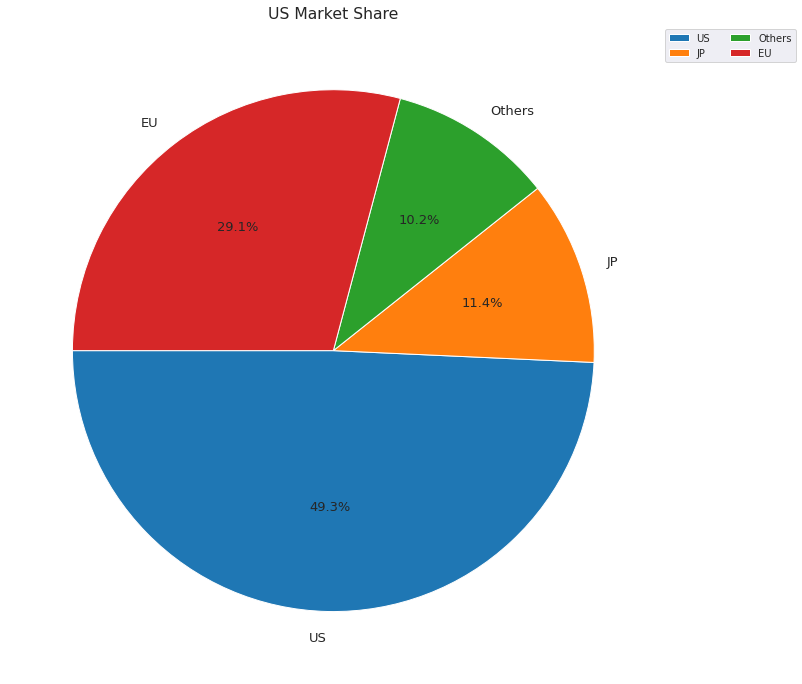

In [97]:
plt.figure(figsize=(24,12))
plt.title("US Market Share")
plt.pie(df.Sales, labels=df.Name, autopct='%1.1f%%', startangle=180);
plt.legend(loc = 2,fontsize  = 10, bbox_to_anchor = (1, 1), ncol = 2)

#### Q2: Assume We want to join the game industry and target the US market. Which genre should we try to make ?

After taking a look at the top 10 genre chart we can see that Action is the most popular genre.But we should check out the top genre in the US first then compare it to other regions.

In [53]:
# sort_values sort the data frame with the correct column name you can specific ascending true | false for 
# head (number) return the number of row 
# we get 1000 result and try get percent of genre that's popular in the US 

top_1000_us = game_sales_df.sort_values('NA_Sales',ascending = False).head(1000)
top_1000_us

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,Tom Clancy's Rainbow Six,PS,1999.0,Shooter,Red Storm Entertainment,0.93,0.63,0.00,0.08,1.64,NaN,NaN,NaN,NaN,NaN,NaN
1308,Mario Superstar Baseball,GC,2005.0,Sports,Nintendo,0.93,0.24,0.25,0.04,1.46,76.0,38.0,8.6,41.0,Namco,E
1246,Mega Man 2,NES,1988.0,Action,Capcom,0.93,0.15,0.42,0.01,1.51,NaN,NaN,NaN,NaN,NaN,NaN
1295,Tom Clancy's Ghost Recon: Future Soldier,X360,2012.0,Shooter,Ubisoft,0.93,0.40,0.02,0.12,1.47,79.0,75.0,7.2,334.0,Ubisoft Paris,M


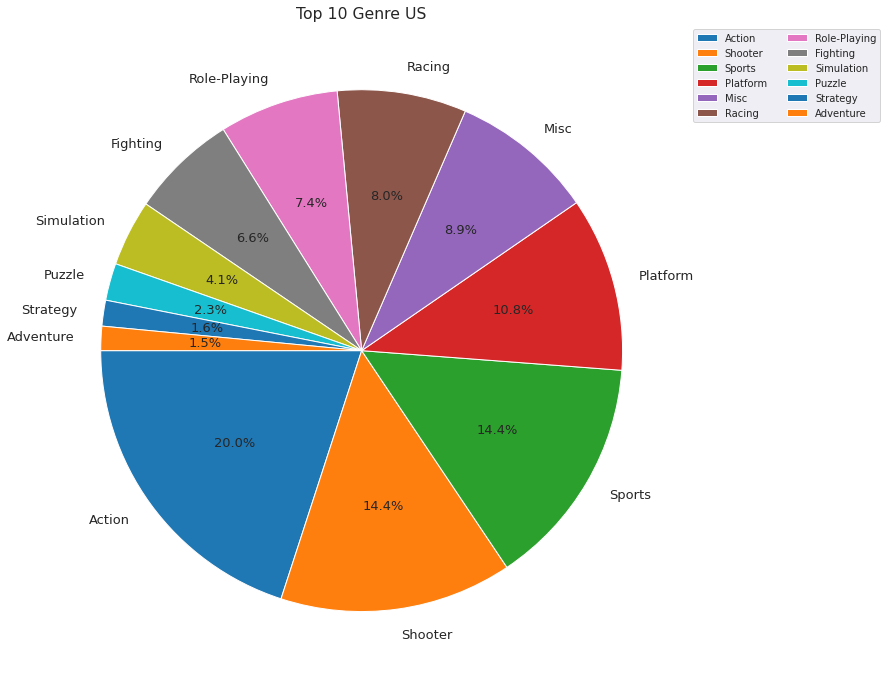

In [55]:
# value_counts : return a Series containing counts of unique values
top_1000_us_genre = top_1000_us.Genre.value_counts()

plt.figure(figsize=(24,12))
plt.title("Top 10 Genre US")
plt.pie(top_1000_us_genre, labels=top_1000_us_genre.index, autopct='%1.1f%%', startangle=180);
plt.legend(loc = 2,fontsize  = 10, bbox_to_anchor = (1, 1), ncol = 2)

Looking at the chart we can safely assume that Action and Shooter are really popular in the US. So for a better chance of success if we want to make games we should create a game combined between Action and Shooter like Overwatch!

#### Q3: Who is the top publisher in Japan ? What game is their best seller and did they focus in some specific genre or just publish whatever they think will be popular ?

Firstly, We should find out who is the current top publisher in Japan. Then we can calculate the genre percent of their published games and create a chart. Looking at the chart can give us a better view for the answer.

In [57]:
top_publishers = game_sales_df.groupby('Publisher').sum()
top_publishers_jp = top_publishers.sort_values('JP_Sales',ascending = False).head(10)
top_publishers_jp

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Publisher,,,,,,,,,
Nintendo,1402730.0,815.86,418.58,457.74,94.55,1786.72,23327.0,12974.0,58061.0
Namco Bandai Games,1877786.0,69.76,42.14,127.62,14.55,254.19,18421.0,7458.0,56891.0
Konami Digital Entertainment,1654446.0,88.67,67.93,91.03,29.54,277.36,22082.0,7101.0,32389.0
Sony Computer Entertainment,1375104.0,266.17,186.40,74.15,79.62,606.27,25827.0,12980.0,88341.0
Capcom,764373.0,78.11,38.46,67.73,14.51,199.08,15187.0,7051.0,28872.0
Sega,1261365.0,107.99,80.08,56.17,23.59,268.06,22051.0,9481.0,34116.0
Square Enix,466439.0,48.23,32.16,50.00,13.59,143.91,10168.0,5520.0,34986.0
SquareSoft,103818.0,11.06,4.95,40.13,1.54,57.65,773.0,176.0,2509.0
Enix Corporation,59928.0,0.76,0.31,32.40,0.27,33.74,294.0,53.0,100.0


So the top publisher in Japan is Nintendo with 457 millions sales. Next let see what is their best seller.

In [58]:
top_games_nintendo = game_sales_df.loc[game_sales_df['Publisher'] == 'Nintendo'].sort_values('JP_Sales',ascending = False).head(10)
top_games_nintendo

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,NaN,NaN,NaN,NaN,NaN,NaN
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.38,4.46,6.04,1.36,18.25,NaN,NaN,NaN,NaN,NaN,NaN
27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.51,3.17,5.65,0.80,15.14,NaN,NaN,NaN,NaN,NaN,NaN
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85,NaN,NaN,NaN,NaN,NaN,NaN
43,Animal Crossing: Wild World,DS,2005.0,Simulation,Nintendo,2.50,3.45,5.33,0.86,12.13,86.0,57.0,8.7,242.0,Nintendo,E
26,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,3.43,5.35,5.32,1.18,15.29,77.0,37.0,7.1,19.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E


The best seller game of Nintendo in Japan is Pokemon Red/Pokemon Blue which sold 10.22 millions copy.

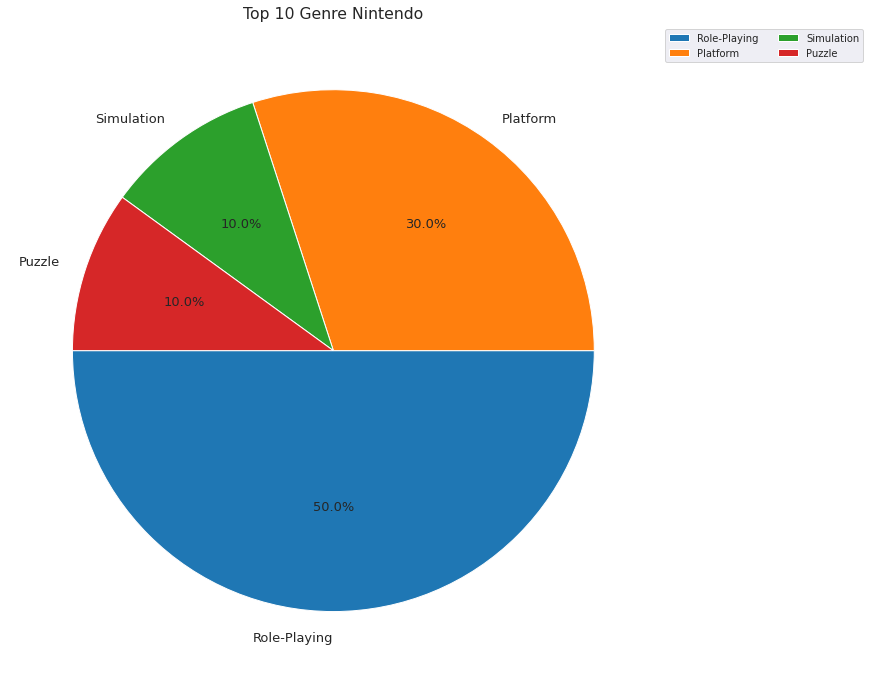

In [64]:
top_genre_nintendo = top_games_nintendo.Genre.value_counts()

plt.figure(figsize=(24,12))
plt.title("Top 10 Genre Nintendo")
plt.pie(top_genre_nintendo, labels=top_genre_nintendo.index, autopct='%1.1f%%', startangle=180);
plt.legend(loc = 2,fontsize  = 10, bbox_to_anchor = (1, 1), ncol = 2)

Their focus seems like Role-Playing (Pokemon series) and Platform (Mario). 

#### Q4: Make a chart to display how the top trending game (genre) in 2008 was doing up to 2015 and how the top trending in 2015 was doing before (to 2008)

In [66]:
top_game_2008 = game_sales_df.loc[game_sales_df['Year_of_Release'] == 2008].sort_values('Global_Sales',ascending = False).head(1)
top_game_2008

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E


In [70]:
top_game_2015 = game_sales_df.loc[game_sales_df['Year_of_Release'] == 2015].sort_values('Global_Sales',ascending = False).head(1)
top_game_2015

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN,NaN,NaN,NaN


so We now have 2 different genre : Racing and Shooting. Let get all the games released between 2008 and 2015.

In [78]:
games_list =  game_sales_df[(game_sales_df['Year_of_Release'] >= 2008) & (game_sales_df['Year_of_Release'] <= 2015)]
games_list = games_list.groupby(['Genre', 'Year_of_Release'], as_index = False).sum()
games_list

,Genre,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
0,Action,2008.0,72.02,38.68,6.00,18.26,135.01,10335.0,4332.0,23708.0
1,Action,2009.0,71.08,38.28,11.96,16.37,137.66,10520.0,4952.0,22754.0
2,Action,2010.0,59.72,34.51,8.58,12.48,115.49,8578.0,4221.0,24132.0
3,Action,2011.0,53.08,39.78,10.82,13.00,116.76,9350.0,4354.0,41308.0
4,Action,2012.0,51.79,41.21,12.31,13.94,119.10,8756.0,4100.0,34180.0
...,...,...,...,...,...,...,...,...,...,...
91,Strategy,2011.0,3.19,2.75,1.90,0.82,8.68,1527.0,547.0,3425.0
92,Strategy,2012.0,0.95,0.95,1.11,0.25,3.27,413.0,146.0,3010.0
93,Strategy,2013.0,2.30,2.43,0.82,0.57,6.09,537.0,318.0,12150.0
94,Strategy,2014.0,0.16,0.22,0.56,0.04,0.99,161.0,98.0,1073.0


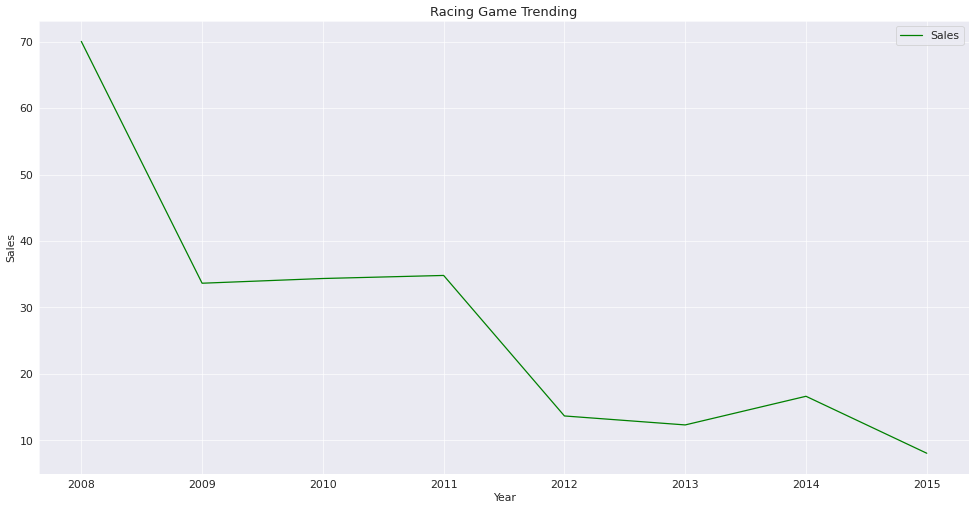

In [80]:
racing_games_list = games_list.loc[games_list['Genre'] == 'Racing']
x = racing_games_list['Year_of_Release']
y = racing_games_list['Global_Sales']

plt.figure(figsize=(20,10), dpi= 60)
plt.plot(x, y, label = 'Sales', color = 'green')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Racing Game Trending')
plt.legend()
plt.show()

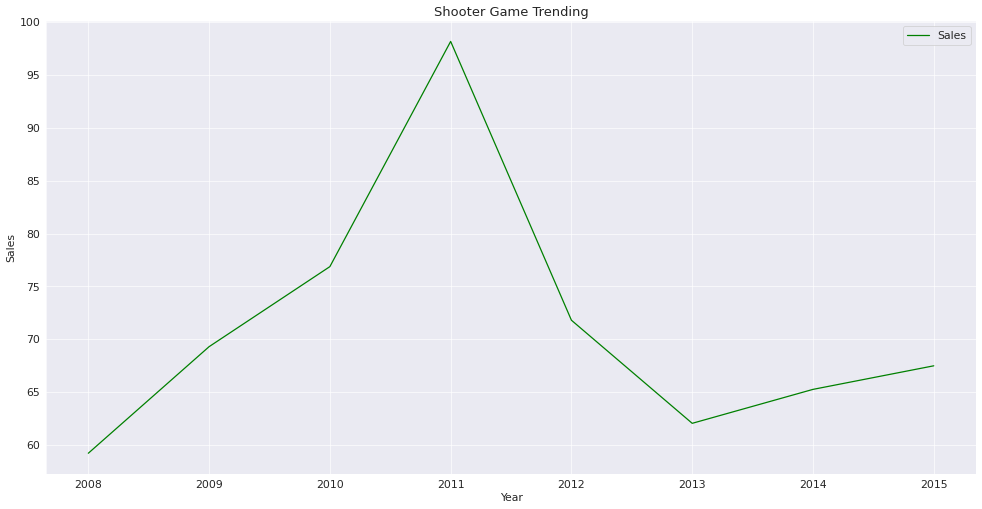

In [82]:
shooting_games_list = games_list.loc[games_list['Genre'] == 'Shooter']
x = shooting_games_list['Year_of_Release']
y = shooting_games_list['Global_Sales']

plt.figure(figsize=(20,10), dpi= 60)
plt.plot(x, y, label = 'Sales', color = 'green')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Shooter Game Trending')
plt.legend()
plt.show()

Let us save and upload our work to Jovian before continuing.

In [98]:
import jovian

In [99]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "indexkyou/data-analysis-of-video-game-sales" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/indexkyou/data-analysis-of-video-game-sales


'https://jovian.ml/indexkyou/data-analysis-of-video-game-sales'

## Inferences and Conclusion

This dataset helps us understand a lot of things about the game market. Here is just a small possible analytics from the data, we haven't even used the other columns like Critic, User, Developer or Rating yet. After just some questions above I realized the importance of data on how we can change it from number to possibility. The number doesn't lie they provide use true information that can be used to improve. 

In [30]:
import jovian

In [31]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## References and Future Work

For my future work I planned to :
- Implement machine training to predict the next trending genre.
- Combine this dataset with specific data about games rating on other websites for evaluation of publishers or companies.
- Making my own dataset by crawing data from website.
- Learn more about data sciences in general to improve my understanding.

In [100]:
import jovian

In [101]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "indexkyou/data-analysis-of-video-game-sales" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/indexkyou/data-analysis-of-video-game-sales


'https://jovian.ml/indexkyou/data-analysis-of-video-game-sales'